In [20]:
import sys
import os
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
sys.path.append("..\\src")
sys.path.append("..\\..")
sys.path.append("..\\..\\ch02\\src")

In [3]:
from config import PATH_TO_DATA
from plotting import plot_decision_surface

# Import iris dataset

In [4]:
b_iris = load_iris()

In [5]:
b_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
b_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X = b_iris.data[:, (2,3)]
y = b_iris.target

# Split into training and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Check whether the classes are equally represented in the training and test set.

In [9]:
np.bincount(y)

array([50, 50, 50], dtype=int64)

In [10]:
np.bincount(y_train)

array([35, 35, 35], dtype=int64)

In [11]:
np.bincount(y_test)

array([15, 15, 15], dtype=int64)

# Scale training and test examples

In [12]:
sd_scaler = StandardScaler()
sd_scaler.fit(X_train)
scaled_X_train = sd_scaler.transform(X_train)
scaled_X_test = sd_scaler.transform(X_test)

# Fit perceptron

In [13]:
perceptron_classifier = Perceptron(eta0=0.005, max_iter=30, shuffle=False)
perceptron_classifier.fit(scaled_X_train, y_train)

Perceptron(eta0=0.005, max_iter=30, shuffle=False)

# Evaluate perceptron classifier

In [14]:
print("Accuracy: %.3f" % perceptron_classifier.score(scaled_X_train, y_train))

Accuracy: 0.895


In [15]:
print("Accuracy: %.3f" % perceptron_classifier.score(scaled_X_test, y_test))

Accuracy: 0.889


In [16]:
y_pred_train = perceptron_classifier.predict(scaled_X_train)
print("Accuracy: %.3f" % accuracy_score(y_train, y_pred_train))

Accuracy: 0.895


In [17]:
y_pred_test = perceptron_classifier.predict(scaled_X_test)
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred_test))

Accuracy: 0.889


# Plot decision regions of the perceptron classifier

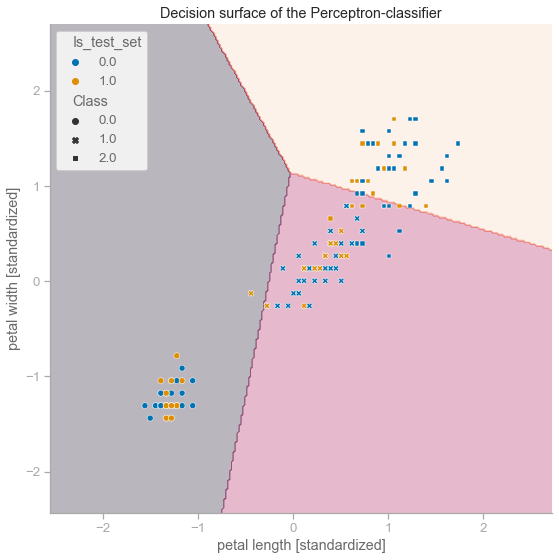

<AxesSubplot:title={'center':'Decision surface of the Perceptron-classifier'}, xlabel='petal length [standardized]', ylabel='petal width [standardized]'>

In [19]:
plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), perceptron_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]))

# Fit logistic regression

In [21]:
logreg_classifier = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
logreg_classifier.fit(scaled_X_train, y_train)

LogisticRegression(C=100, random_state=1)

# Return the class labels predicted using logistiv regression

In [26]:
logreg_classifier.predict(scaled_X_test)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

The class is assigned to the label with the highest predicted probability.

In [31]:
logreg_classifier.predict_proba(scaled_X_test).argmax(axis=1)  # Returns the predicted class labels

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0], dtype=int64)

# Plot decision regions of the logistic regression classifier

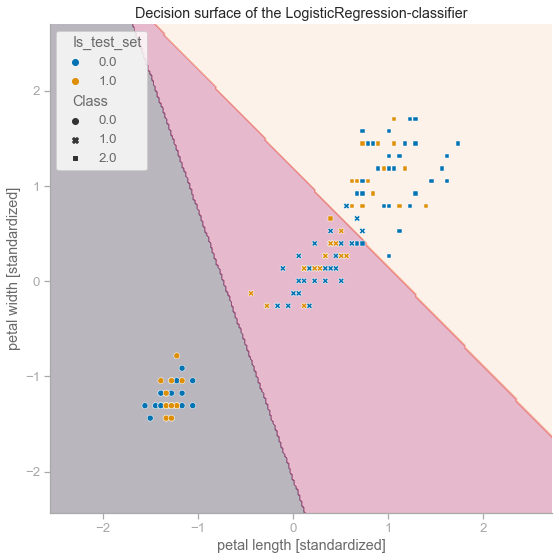

<AxesSubplot:title={'center':'Decision surface of the LogisticRegression-classifier'}, xlabel='petal length [standardized]', ylabel='petal width [standardized]'>

In [23]:
plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), logreg_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]))